In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rpaguirre_tesla_stock_price_path = kagglehub.dataset_download('rpaguirre/tesla-stock-price')

print('Data source import complete.')


<a id="1"></a>
## 1.Loading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [2]:
data = pd.read_csv("Tesla.csv - Tesla.csv.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


<a id="2"></a>
## 2.Spliting Data as Train and Validation

In [5]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1692
Train data length : 1184
Validation data lenth : 508


In [6]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [7]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


<a id="3"></a>
## 3.Creating Train Dataset from Train split

* We will get Open column as our dataset
* Dataset to be converted to array by adding `.values`

In [8]:
dataset_train = train_data.Open.values
dataset_train.shape

(1184,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

#### <a id="4"></a>
## 4.Normalization / Feature Scaling

* Dataset values will be in between 0 and 1 after scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1184, 1)

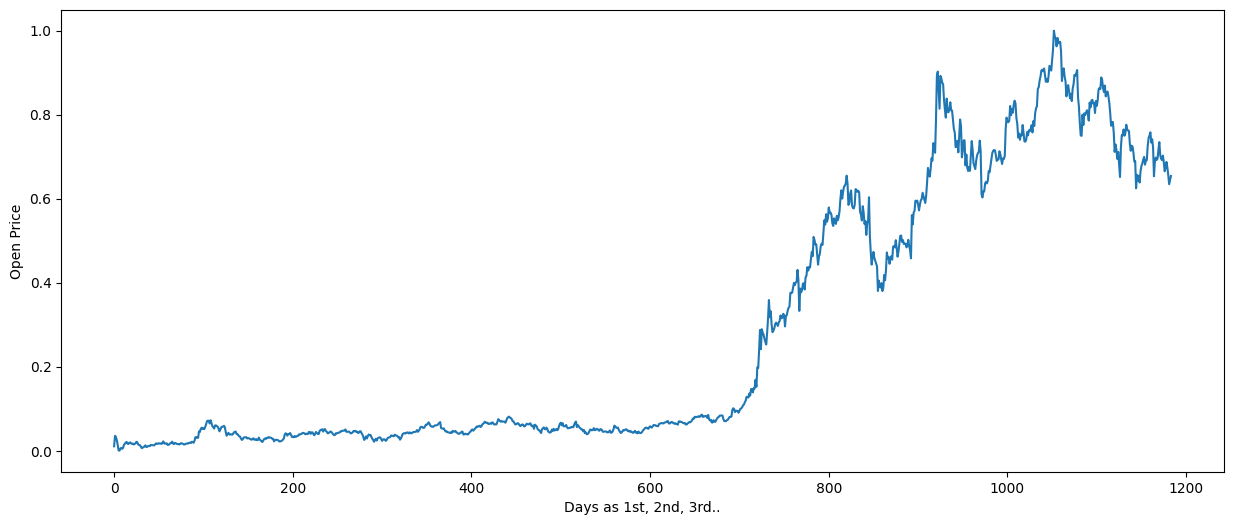

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

<a id="5"></a>
## 5.Creating X_train and y_train from Train data

![image.png](attachment:image.png)

In [12]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)


In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1134, 50)
Shape of y_train before reshape : (1134,)


## Reshape

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1134, 50, 1)
Shape of y_train after reshape : (1134, 1)


* Shape of X_train : 1134 x 50 x 1
* That means we have 1134 rows, each row has 50 rows and 1 column
* Lets check the first row: it has 50 rows (open prices of 49 days)

In [15]:
X_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

* Check the first item in y_train
* It is the price of 50th day

In [16]:
y_train[0]

array([0.01789858])

<a id="6"></a>
## 6.Creating RNN model

In [22]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.0000e+00 - loss: 0.3861
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0018 - loss: 0.2271
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 9.6639e-05 - loss: 0.1126
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 3.2708e-04 - loss: 0.0857
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 4.3277e-04 - loss: 0.0728
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.4863e-04 - loss: 0.0587
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 9.9944e-04 - loss: 0.0519
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 2.6331e-04 - loss: 0.0376
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0013 - loss: 0.0346
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0027 - loss: 0.0259
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 9.2906e-04 - loss: 0.0267
Epoch 12/50
36/36 ━━━━━━━━━━━━━

<a id="7"></a>
## 7.Evaluating Model

In [23]:
# Losses
history.history["loss"]

[0.3033539652824402,
 0.19626887142658234,
 0.12095946073532104,
 0.07946352660655975,
 0.0677427127957344,
 0.055150553584098816,
 0.047389574348926544,
 0.038430746644735336,
 0.03497212752699852,
 0.0264208372682333,
 0.024145856499671936,
 0.02175583504140377,
 0.018825046718120575,
 0.01919865421950817,
 0.016640014946460724,
 0.016037127003073692,
 0.014362668618559837,
 0.014315765351057053,
 0.01306272391229868,
 0.011713642627000809,
 0.011315175332129002,
 0.010734212584793568,
 0.009556273929774761,
 0.00967014953494072,
 0.010206937789916992,
 0.009548396803438663,
 0.008997432887554169,
 0.00837053544819355,
 0.007509601768106222,
 0.007620915770530701,
 0.0073380740359425545,
 0.007519726175814867,
 0.00761426193639636,
 0.006953679025173187,
 0.005895411595702171,
 0.006247576791793108,
 0.006598091218620539,
 0.005939467344433069,
 0.006041495129466057,
 0.004974763840436935,
 0.005296462215483189,
 0.00482118921354413,
 0.004956813994795084,
 0.005105892196297646,
 0.0

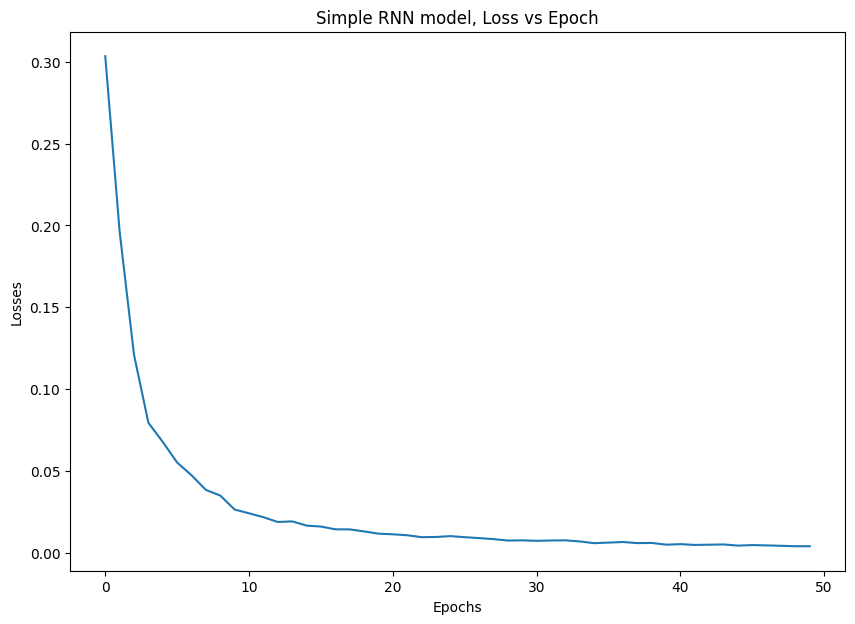

In [24]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

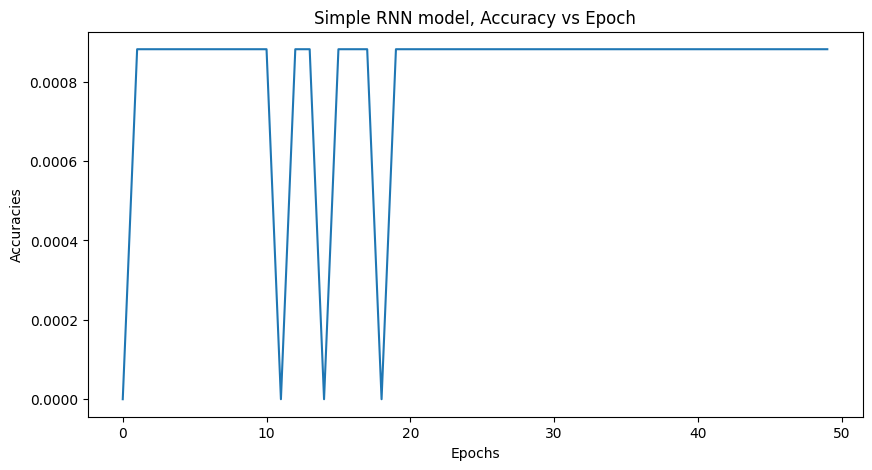

In [25]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data

In [26]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


(1134, 1)

In [27]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1134, 1)

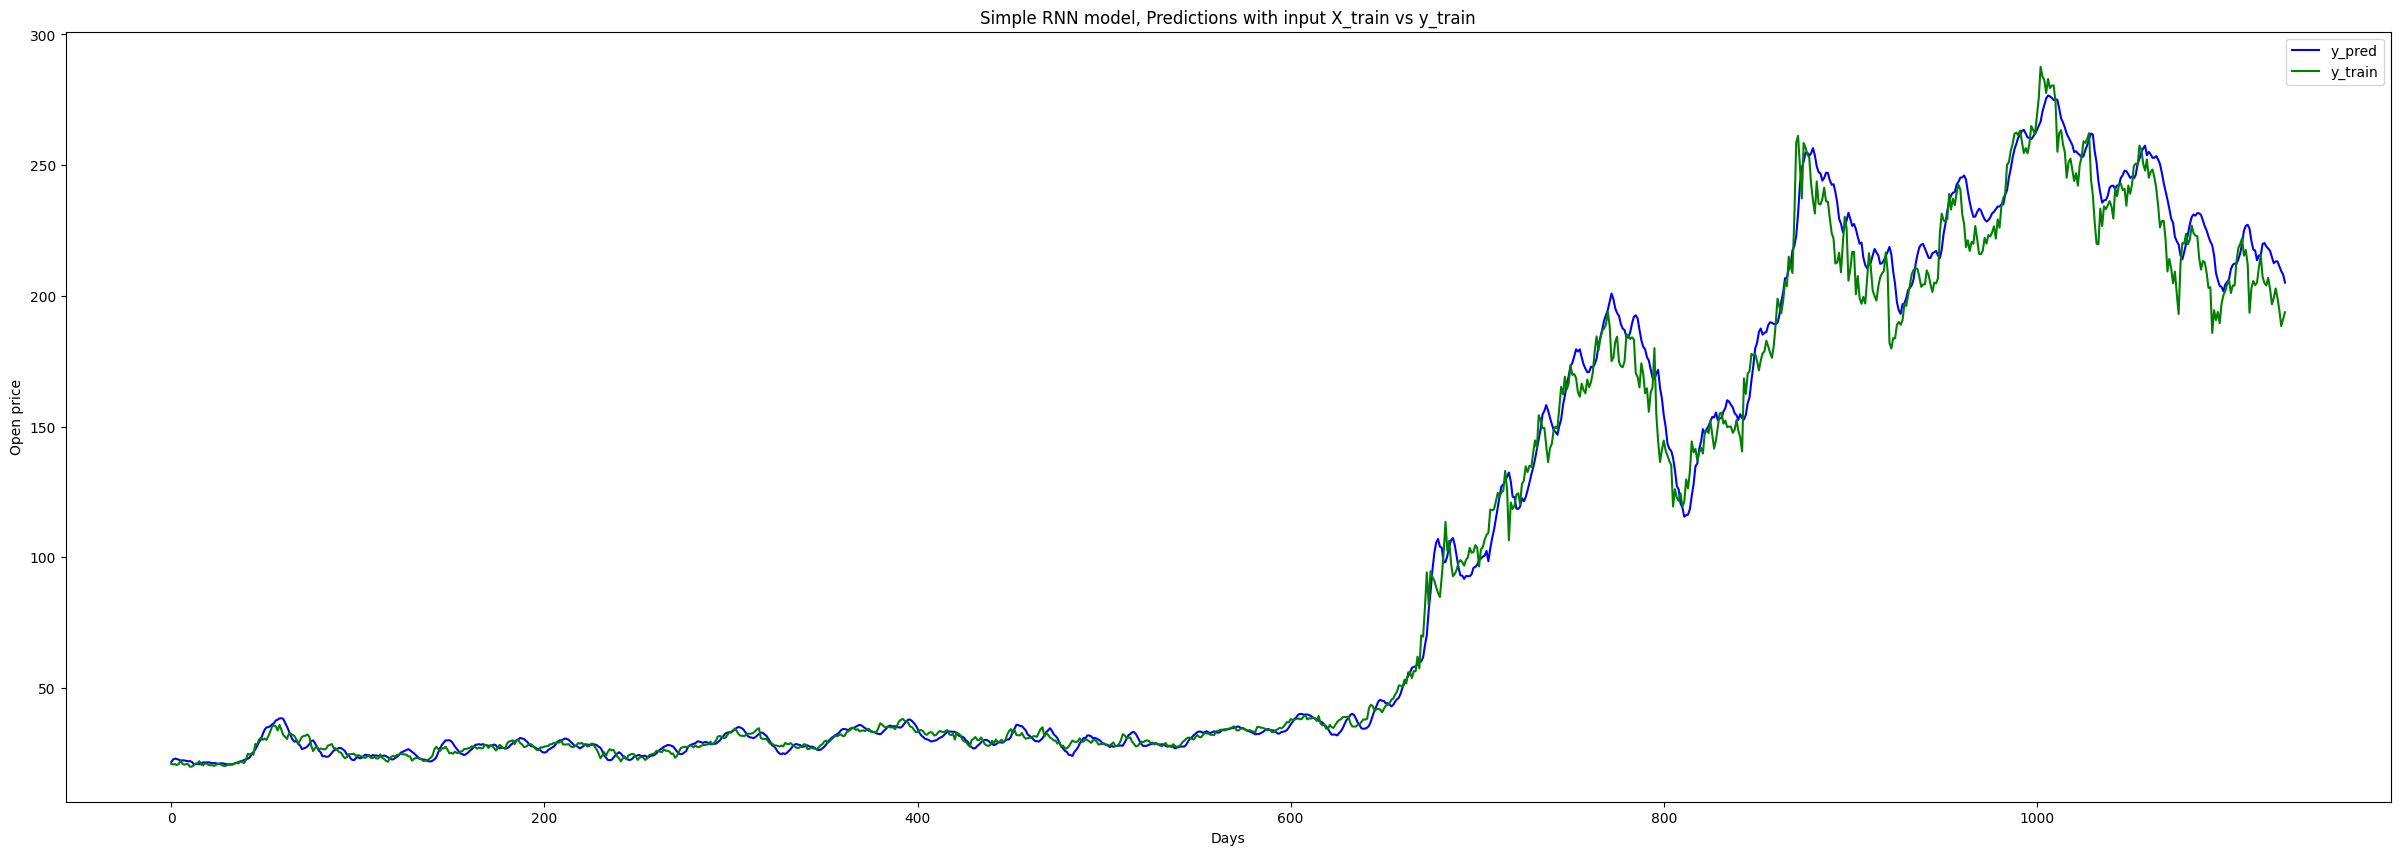

In [28]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()


<a id="8"></a>
## 8.Creating Test Dataset from Validation Data

### Converting array and scaling

In [29]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (508, 1)


### Creating X_test and y_test

In [30]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

### Converting to array

In [31]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [32]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (458, 50)
Shape of y_test before reshape : (458,)


### Reshape

In [33]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [34]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (458, 50, 1)
Shape of y_test after reshape : (458, 1)


<a id="9"></a>
## 9.Evaluating with Validation Data

In [35]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of y_pred_of_test : (458, 1)


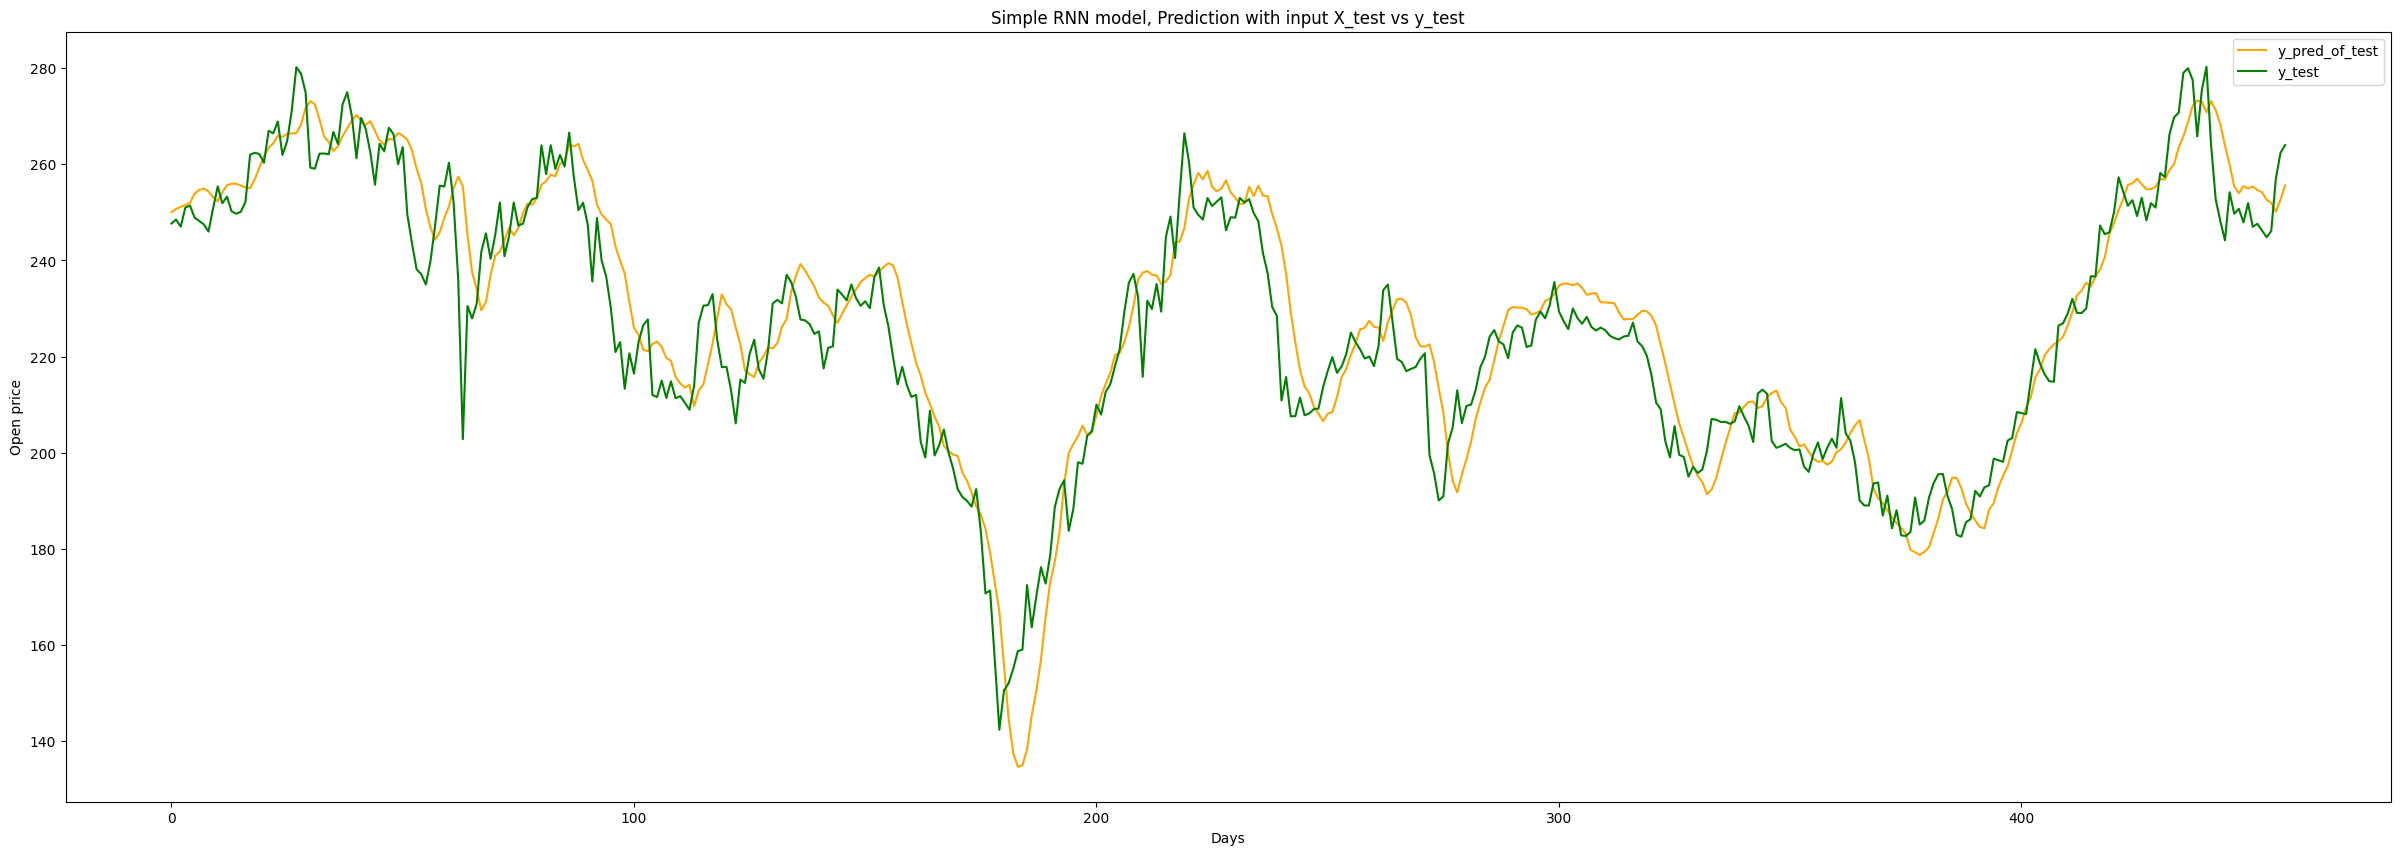

In [36]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

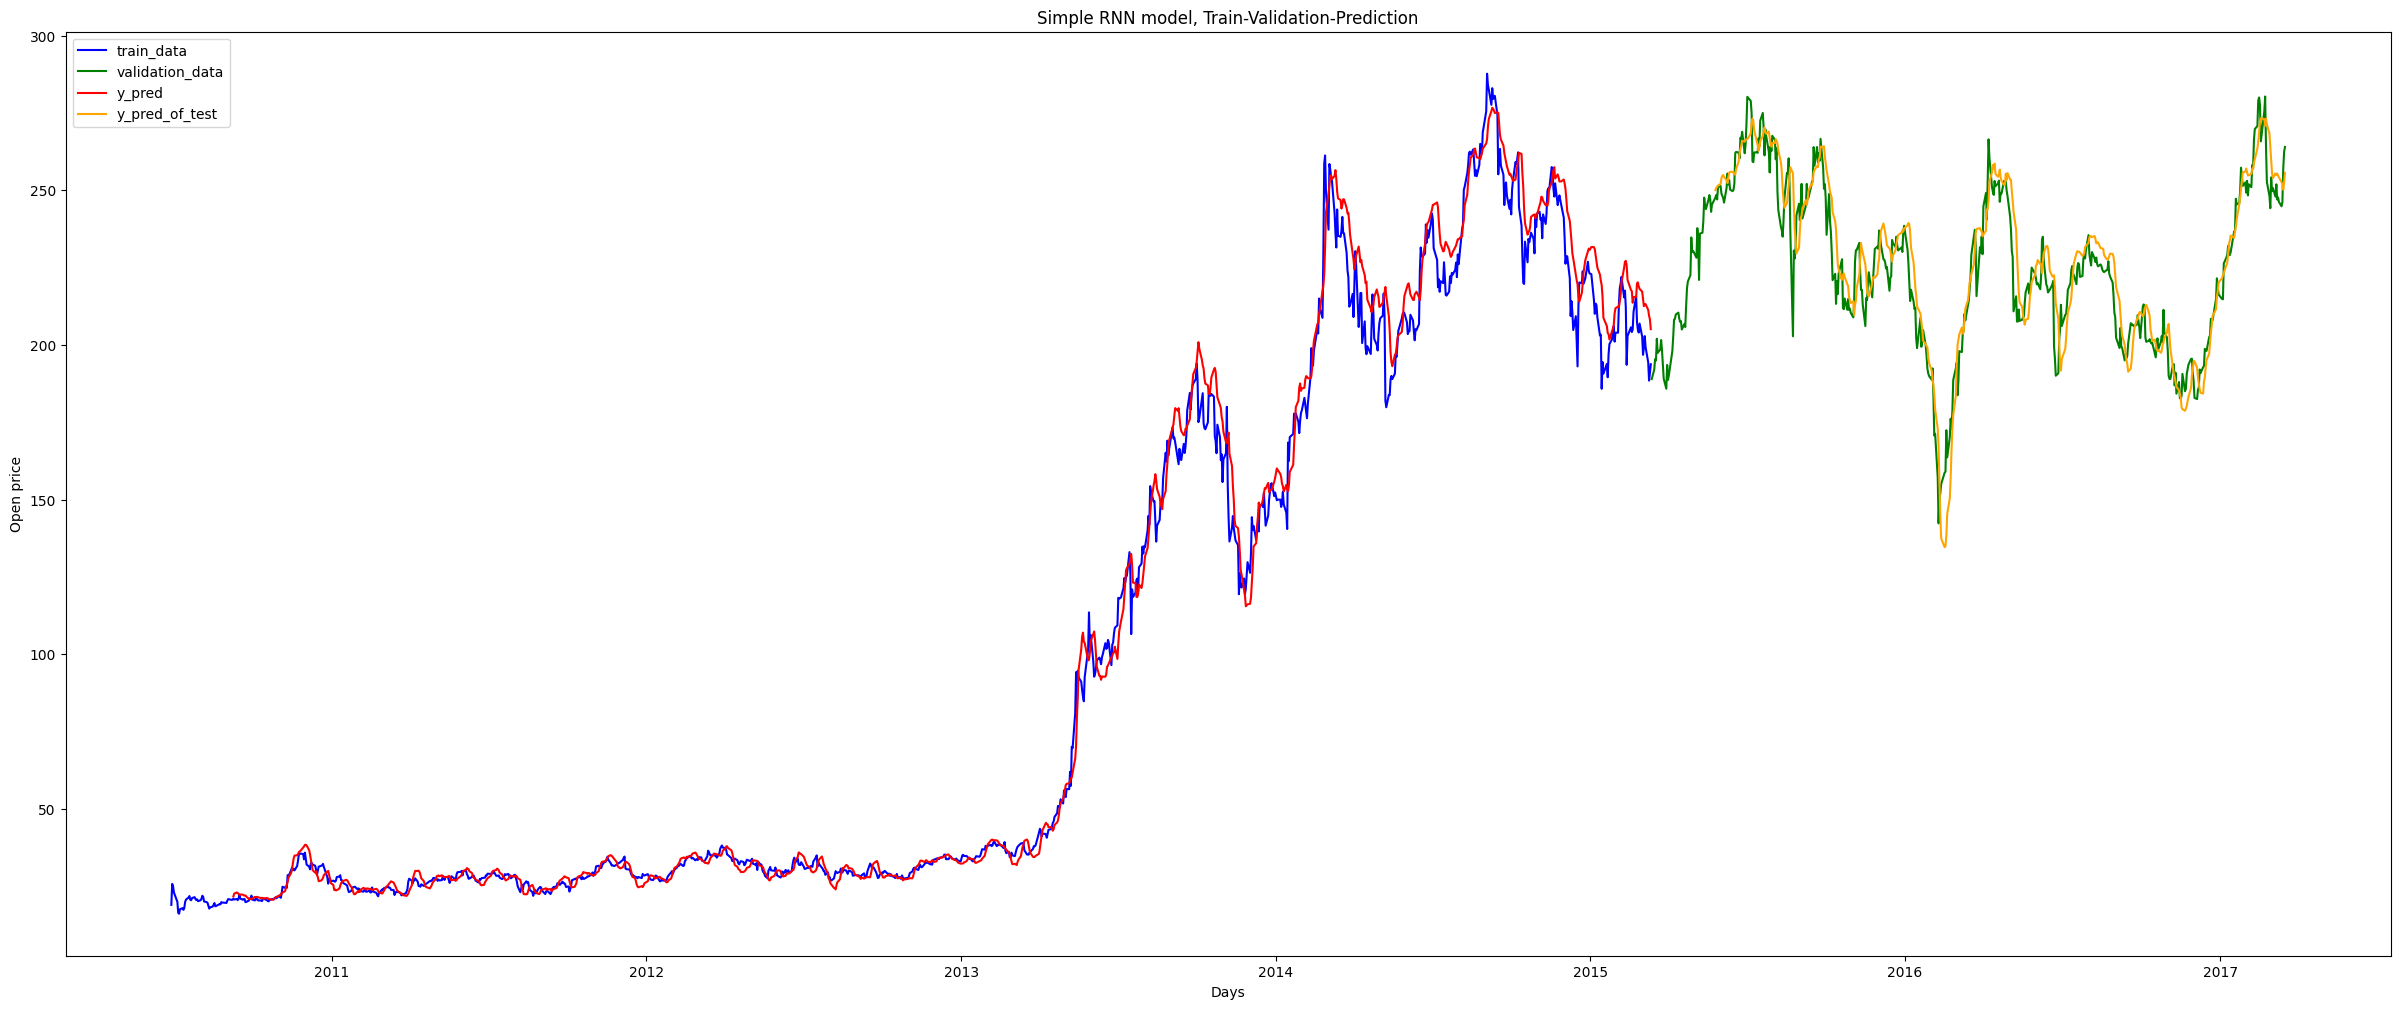

In [37]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

<a id="10"></a>
## 10.Creating LSTM Model

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)


<a id="11"></a>
## 11.Evaluating LSTM Model

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

<a id="12"></a>
## 12.Future price prediction

* Which day is the last day in our data?

In [ ]:
data.iloc[-1]

* We can predict the open price for the day after 3/17/2017--> for  3/18/2017.
* We will use last 50 days Open price as input of our model for this prediction
* Let us prepare it:

In [ ]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

## Thanks for reading, please upvote:)